In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 # Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy import stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score
SEED=30

# Load the dataset
data = pd.read_csv('D:/JN/TUANDROMD.csv')

# Define class labels
classes = {0: 'malware', 1: 'good ware'}


In [2]:
from sklearn.utils import resample

# Separate classes
malware = data[data['Label'] == 0]
goodware = data[data['Label'] == 1]

# Downsample goodware
goodware_downsampled = resample(goodware,
                                replace=False,    # without replacement
                                n_samples=len(malware),  # match minority
                                random_state=SEED)

# Combine
data_balanced = pd.concat([malware, goodware_downsampled])


In [3]:
malware_upsampled = resample(malware,
                             replace=True,     # with replacement
                             n_samples=len(goodware),  # match majority
                             random_state=SEED)

data_balanced = pd.concat([malware_upsampled, goodware])


In [4]:
data.isnull().sum()[data.isnull().sum() > 0]

ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
ACCESS_COARSE_UPDATES                                       1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Label                                                       1
Length: 242, dtype: int64

In [5]:
# Separate features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

In [6]:
# Separate features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

# Remove rows with NaN values in the target variable
X = X[~y.isnull()]  # Keep rows in X where y is not null
y = y[~y.isnull()]  # Keep rows in y where y is not null

# Calculate feature importance using Mutual Information and Point-Biserial correlation
point_biserial_coefs = []
for i in range(X.shape[1]):
    coef = stats.pointbiserialr(X.iloc[:, i], y)[0]
    point_biserial_coefs.append(coef)

mutual_inf = mutual_info_classif(X, y)

C:\Users\Elnour Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:5657: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


In [7]:
# Create a DataFrame to store feature importance
feature_importance = pd.DataFrame({'Mutual Inf': mutual_inf, 'Point-BiSerial': point_biserial_coefs}, index=X.columns)

In [8]:
# Sort feature importance based on 'Point-BiSerial' column in descending order
sorted_feature_importance = feature_importance.sort_values(by='Point-BiSerial', ascending=False)

print(sorted_feature_importance)

                           Mutual Inf  Point-BiSerial
RECEIVE_BOOT_COMPLETED       0.237542        0.760417
GET_TASKS                    0.163088        0.563214
WAKE_LOCK                    0.090493        0.472105
KILL_BACKGROUND_PROCESSES    0.107759        0.438312
SYSTEM_ALERT_WINDOW          0.047618        0.281178
...                               ...             ...
SEND                         0.000000             NaN
WRITE                        0.006117             NaN
WRITE_AVSETTING              0.002477             NaN
WRITE_DATA                   0.000000             NaN
WRITE_DATABASES              0.000000             NaN

[241 rows x 2 columns]


In [9]:
feature_importance.sort_values(by = 'Mutual Inf', ascending = False)


,Mutual Inf,Point-BiSerial
RECEIVE_BOOT_COMPLETED,0.237542,0.760417
Ljava/net/URL;->openConnection,0.212453,-0.712211
Landroid/location/LocationManager;->getLastK0wnLocation,0.174867,-0.653875
GET_TASKS,0.163088,0.563214
KILL_BACKGROUND_PROCESSES,0.107759,0.438312
...,...,...
MOUNT_UNMOUNT_FILESYSTEMS,0.000000,-0.024456
NFC,0.000000,-0.017844
PERSISTENT_ACTIVITY,0.000000,0.049594
PERMISSION,0.000000,NaN


In [10]:
# drop highly correlated features
X.drop(['RECEIVE_BOOT_COMPLETED', 'Landroid/location/LocationManager;->getLastK0wnLocation', 'Ljava/net/URL;->openConnection'], axis = 1, inplace = True)

In [11]:
print(X.columns)


Index(['ACCESS_ALL_DOWNLOADS', 'ACCESS_CACHE_FILESYSTEM',
       'ACCESS_CHECKIN_PROPERTIES', 'ACCESS_COARSE_LOCATION',
       'ACCESS_COARSE_UPDATES', 'ACCESS_FINE_LOCATION',
       'ACCESS_LOCATION_EXTRA_COMMANDS', 'ACCESS_MOCK_LOCATION',
       'ACCESS_MTK_MMHW', 'ACCESS_NETWORK_STATE',
       ...
       'Landroid/content/pm/PackageManager;->getInstalledPackages',
       'Landroid/telephony/TelephonyManager;->getLine1Number',
       'Landroid/telephony/TelephonyManager;->getNetworkOperator',
       'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
       'Landroid/telephony/TelephonyManager;->getNetworkCountryIso',
       'Landroid/telephony/TelephonyManager;->getSimOperator',
       'Landroid/telephony/TelephonyManager;->getSimOperatorName',
       'Landroid/telephony/TelephonyManager;->getSimCountryIso',
       'Landroid/telephony/TelephonyManager;->getSimSerialNumber',
       'Lorg/apache/http/impl/client/DefaultHttpClient;->execute'],
      dtype='object', length=2

In [12]:
SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = SEED)

print('train samples ->', X_train.shape)
print('test samples ->', X_test.shape)

train samples -> (3348, 238)
test samples -> (1116, 238)


In [13]:
# Scaling numerical data
MM = MinMaxScaler()
MM_fit = MM.fit(X_train)
X_train = MM_fit.transform(X_train)
X_test = MM_fit.transform(X_test)


In [14]:
# Initialize the your model

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors 
#model =---------------------

# Train the model on the training data
model.fit(X_train, y_train)



KNeighborsClassifier()

In [15]:
# Make predictions
pred = model.predict(X_test)

# Calculate Mean Squared Error and Accuracy Score
mse = mean_squared_error(y_test, pred) # Calculate MSE
acc = accuracy_score(y_test, pred)

print('Mean Squared Error : {0:.5f}'.format(mse))
print('Accuracy Score : {0:.2f} %'.format(acc * 100))

C:\Users\Elnour Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Elnour Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Elnour Tech\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Elnour Tech\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, p

Mean Squared Error : 0.01971
Accuracy Score : 98.03 %


              precision    recall  f1-score   support

     malware       0.94      0.96      0.95       226
   good ware       0.99      0.99      0.99       890

    accuracy                           0.98      1116
   macro avg       0.97      0.97      0.97      1116
weighted avg       0.98      0.98      0.98      1116



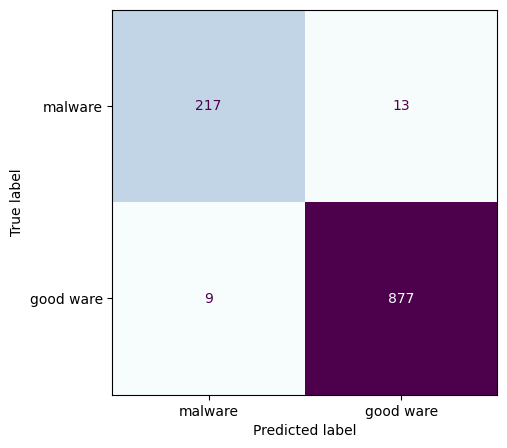

In [16]:
# classification report

clf_report = classification_report(pred, y_test, target_names = list(classes.values()))
print(clf_report)
# Generate confusion matrix and plot it
cm = confusion_matrix(y_test, pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(classes.values()))

fig, ax = plt.subplots(figsize=(5, 5))
cmd.plot(ax=ax, cmap='BuPu', colorbar=False)

In [17]:
# Define GA hyperparameters
size = 100  # Population size
n_feat = X_train.shape[1]  # Number of features
n_parents = 50  # Number of parents to select
mutation_rate = 0.1  # Mutation rate
n_gen = 100  # Number of generations

In [18]:
# Function for initialization of population in GA
def initialization_of_population(size, n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat, dtype=bool)
        chromosome[:int(0.3 * n_feat)] = False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [19]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        model.fit(X_train[:, chromosome], y_train)
        predictions = model.predict(X_test[:, chromosome])
        scores.append(accuracy_score(y_test, predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds, :][::-1])

In [20]:
# Function for selection in GA
def selection(pop_after_fit, n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

In [21]:
# Function for crossover in GA
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0, len(pop_after_sel), 2):
        new_par = []
        child_1, child_2 = pop_nextgen[i], pop_nextgen[i + 1]
        new_par = np.concatenate((child_1[:len(child_1) // 2], child_2[len(child_1) // 2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

In [22]:
# Function for mutation in GA
def mutation(pop_after_cross, mutation_rate, n_feat):
    mutation_range = int(mutation_rate * n_feat)
    pop_next_gen = []
    for n in range(0, len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0, mutation_range):
            pos = np.random.randint(0, n_feat - 1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [23]:
# Function for GA generations
def generations(size, n_feat, n_parents, mutation_rate, n_gen, X_train, X_test, y_train, y_test):
    best_chromo = []
    best_score = []
    population_nextgen = initialization_of_population(size, n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation', i + 1, ':', scores[:1])  # Print best score in each generation
        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate, n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo, best_score

In [24]:
# Run GA after hyperparameter optimization
best_chromo, best_score = generations(size, n_feat, n_parents, mutation_rate, n_gen,
                                                               X_train, X_test, y_train, y_test)

Best score in generation 1 : [0.9865591397849462]
Best score in generation 2 : [0.985663082437276]
Best score in generation 3 : [0.985663082437276]
Best score in generation 4 : [0.9847670250896058]
Best score in generation 5 : [0.9874551971326165]
Best score in generation 6 : [0.9874551971326165]
Best score in generation 7 : [0.9865591397849462]
Best score in generation 8 : [0.9874551971326165]
Best score in generation 9 : [0.985663082437276]
Best score in generation 10 : [0.985663082437276]
Best score in generation 11 : [0.985663082437276]
Best score in generation 12 : [0.985663082437276]
Best score in generation 13 : [0.985663082437276]
Best score in generation 14 : [0.9874551971326165]
Best score in generation 15 : [0.9874551971326165]
Best score in generation 16 : [0.985663082437276]
Best score in generation 17 : [0.9874551971326165]
Best score in generation 18 : [0.9883512544802867]
Best score in generation 19 : [0.985663082437276]
Best score in generation 20 : [0.9847670250896058

In [25]:
# Get the best chromosome
best_chromosome = best_chromo[-1]

# Filter features based on the best chromosome
selected_features = X.columns[best_chromosome]

print("Best features selected by GA:")
print(selected_features)


Best features selected by GA:
Index(['ACCESS_ALL_DOWNLOADS', 'ACCESS_CACHE_FILESYSTEM',
       'ACCESS_CHECKIN_PROPERTIES', 'ACCESS_FINE_LOCATION', 'ACCESS_MTK_MMHW',
       'ACCESS_PROVIDER', 'activityCalled', 'ADD_VOICEMAIL', 'ANT_ADMIN',
       'AUTORUN_MANAGER_LICENSE_MANAGER',
       ...
       'Landroid/telephony/SmsManager;->sendTextMessage',
       'Landroid/content/pm/PackageManager;->getInstalledApplications',
       'Landroid/content/pm/PackageManager;->getInstalledPackages',
       'Landroid/telephony/TelephonyManager;->getLine1Number',
       'Landroid/telephony/TelephonyManager;->getNetworkOperator',
       'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
       'Landroid/telephony/TelephonyManager;->getSimOperator',
       'Landroid/telephony/TelephonyManager;->getSimOperatorName',
       'Landroid/telephony/TelephonyManager;->getSimSerialNumber',
       'Lorg/apache/http/impl/client/DefaultHttpClient;->execute'],
      dtype='object', length=122)


In [27]:
# Select only the best features for training
X_train_ga = X_train[:, best_chromosome]
X_test_ga = X_test[:, best_chromosome]

# Initialize and train SVM model using the best features selected by GA
model_ga = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors 
model_ga.fit(X_train_ga, y_train)


KNeighborsClassifier()

In [28]:

# Make predictions
pred_ga = model_ga.predict(X_test_ga)

# Evaluate the model
acc_ga = accuracy_score(y_test, pred_ga)
print('Accuracy Score using selected features by GA: {0:.2f} %'.format(acc_ga * 100))

# Classification report
clf_report_ga = classification_report(y_test, pred_ga, target_names=list(classes.values()))
print("Classification Report using selected features by GA:")
print(clf_report_ga)

Accuracy Score using selected features by GA: 98.39 %
Classification Report using selected features by GA:
              precision    recall  f1-score   support

     malware       0.98      0.94      0.96       230
   good ware       0.99      0.99      0.99       886

    accuracy                           0.98      1116
   macro avg       0.98      0.97      0.98      1116
weighted avg       0.98      0.98      0.98      1116



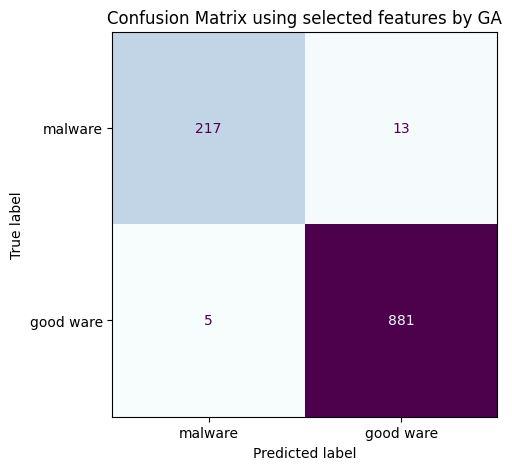

In [29]:
# Generate confusion matrix and plot it
cm_ga = confusion_matrix(y_test, pred_ga)
cmd_ga = ConfusionMatrixDisplay(cm_ga, display_labels=list(classes.values()))

fig, ax = plt.subplots(figsize=(5, 5))
cmd_ga.plot(ax=ax, cmap='BuPu', colorbar=False)
plt.title("Confusion Matrix using selected features by GA")
plt.show()

In [30]:
import numpy as np
from sklearn.metrics import accuracy_score

# PSO parameters
n_particles = 30       # Number of particles in the swarm
n_iterations = 50      # Number of iterations (generations)
n_features = X_train.shape[1]  # Number of features

w = 0.5                # Inertia weight
c1 = 1.5               # Cognitive component (personal best influence)
c2 = 1.5               # Social component (global best influence)

# Set random seed for reproducibility
np.random.seed(SEED)

# Initialize particles and velocities
particles = np.random.rand(n_particles, n_features)      # Positions (values between 0 and 1)
velocities = np.random.rand(n_particles, n_features)     # Velocities

# Initialize personal best positions and scores
personal_best_positions = particles.copy()
personal_best_scores = np.zeros(n_particles)

# Evaluate initial particles
for i in range(n_particles):
    selected = particles[i] > 0.5  # Binary mask for selected features
    if np.sum(selected) == 0:      # If no feature selected
        personal_best_scores[i] = 0
    else:

        model.fit(X_train[:, selected], y_train)
        preds = model.predict(X_test[:, selected])
        personal_best_scores[i] = accuracy_score(y_test, preds)

# Find the global best particle
global_best_idx = np.argmax(personal_best_scores)
global_best_position = personal_best_positions[global_best_idx].copy()

# PSO main loop
for iteration in range(n_iterations):
    for i in range(n_particles):
        # Generate random numbers for velocity update
        r1 = np.random.rand(n_features)
        r2 = np.random.rand(n_features)

        # Update velocity based on personal and global bests
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best_positions[i] - particles[i])
            + c2 * r2 * (global_best_position - particles[i])
        )

        # Update particle position and clip to [0, 1]
        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], 0, 1)

        # Evaluate new position
        selected = particles[i] > 0.5
        if np.sum(selected) == 0:
            score = 0
        else:
            model = KNeighborsClassifier(n_neighbors=5)
            model.fit(X_train[:, selected], y_train)
            preds = model.predict(X_test[:, selected])
            score = accuracy_score(y_test, preds)

        # Update personal best if current score is better
        if score > personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = particles[i].copy()

    # Update global best
    global_best_idx = np.argmax(personal_best_scores)
    global_best_position = personal_best_positions[global_best_idx].copy()

    print(f"Iteration {iteration+1}/{n_iterations}, Best Accuracy: {personal_best_scores[global_best_idx]:.4f}")

# Get the best feature subset from the final global best particle
best_features_mask = global_best_position > 0.5
selected_features = X.columns[best_features_mask]
print("Best features selected by PSO:")
print(selected_features)

# Train final model using selected features
X_train_pso = X_train[:, best_features_mask]
X_test_pso = X_test[:, best_features_mask]

final_model = KNeighborsClassifier(n_neighbors=5)
final_model.fit(X_train_pso, y_train)
pred_pso = final_model.predict(X_test_pso)
acc_pso = accuracy_score(y_test, pred_pso)

print("Accuracy using PSO-selected features: {:.2f}%".format(acc_pso * 100))


Iteration 1/50, Best Accuracy: 0.9848
Iteration 2/50, Best Accuracy: 0.9857
Iteration 3/50, Best Accuracy: 0.9857
Iteration 4/50, Best Accuracy: 0.9857
Iteration 5/50, Best Accuracy: 0.9857
Iteration 6/50, Best Accuracy: 0.9866
Iteration 7/50, Best Accuracy: 0.9866
Iteration 8/50, Best Accuracy: 0.9866
Iteration 9/50, Best Accuracy: 0.9866
Iteration 10/50, Best Accuracy: 0.9875
Iteration 11/50, Best Accuracy: 0.9875
Iteration 12/50, Best Accuracy: 0.9875
Iteration 13/50, Best Accuracy: 0.9875
Iteration 14/50, Best Accuracy: 0.9875
Iteration 15/50, Best Accuracy: 0.9875
Iteration 16/50, Best Accuracy: 0.9875
Iteration 17/50, Best Accuracy: 0.9875
Iteration 18/50, Best Accuracy: 0.9875
Iteration 19/50, Best Accuracy: 0.9875
Iteration 20/50, Best Accuracy: 0.9875
Iteration 21/50, Best Accuracy: 0.9875
Iteration 22/50, Best Accuracy: 0.9875
Iteration 23/50, Best Accuracy: 0.9875
Iteration 24/50, Best Accuracy: 0.9875
Iteration 25/50, Best Accuracy: 0.9875
Iteration 26/50, Best Accuracy: 0.

In [31]:

# Generate classification report
print("\nClassification Report after using PSO:")
print(classification_report(y_test, pred_pso))


Classification Report after using PSO:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       230
         1.0       0.99      0.99      0.99       886

    accuracy                           0.99      1116
   macro avg       0.98      0.98      0.98      1116
weighted avg       0.99      0.99      0.99      1116




Confusion Matrix:
[[223   7]
 [  6 880]]


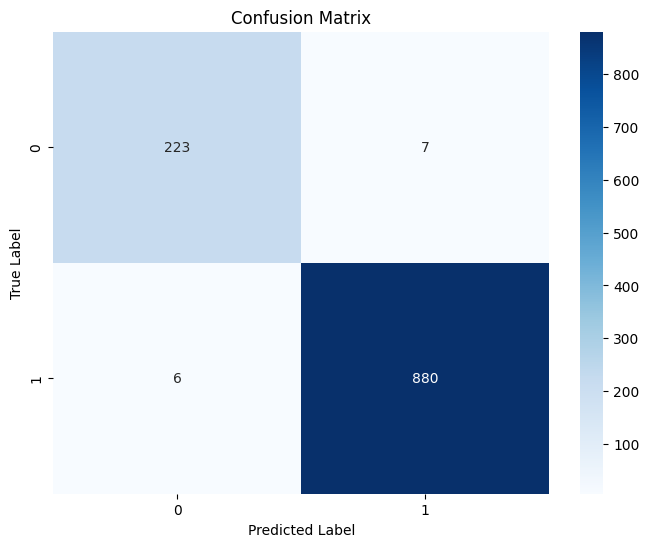

In [32]:
# Generate confusion matrix
cm = confusion_matrix(y_test, pred_pso)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix (optional, requires matplotlib and seaborn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

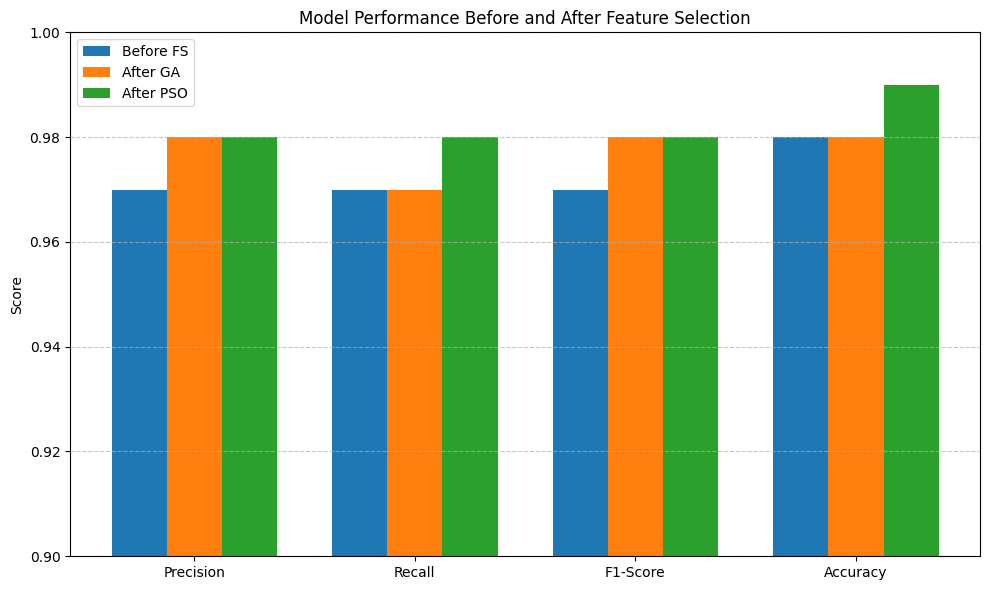

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

before = [0.97, 0.97, 0.97, 0.98]  # Macro avg + accuracy
ga     = [0.98, 0.97, 0.98, 0.98]
pso    = [0.98, 0.98, 0.98, 0.99]

# Bar width and x locations
x = np.arange(len(labels))
width = 0.25

# Create plot
plt.figure(figsize=(10, 6))
plt.bar(x - width, before, width, label='Before FS', color='#1f77b4')
plt.bar(x, ga, width, label='After GA', color='#ff7f0e')
plt.bar(x + width, pso, width, label='After PSO', color='#2ca02c')

# Labels and formatting
plt.ylabel('Score')
plt.ylim(0.90, 1.0)
plt.title('Model Performance Before and After Feature Selection')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
